# Simple notebook to do a comparitive time series between one or more countries

In [262]:
import requests
import io 
import pandas as pd

# Load Corona Virus Data

In [263]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))



# Load Population Data

# Create Generic Functions

In [264]:
# Function for getting data for country 
def getDataForCountry(countryName,dataFr):
    df_country = dataFr.loc[df['Country/Region'] == countryName]
    df_country = df_country.transpose()
    df_country=df_country.drop(df_country.index[[0,1,2,3]])
    df_country[countryName] =  df_country.iloc[: , 0]

    # Iterate over the sequence of column names to append
    for index in range(df_country.shape[1]-1):
       if index>0:
           df_country[countryName] =  df_country[countryName] +  df_country.iloc[: , index]
    # Remove the extra columns 
    for index in range(df_country.shape[1]-1):
        df_country.drop(df_country.columns[0], axis = 1, inplace = True) 
    return df_country;





In [265]:
# Function for getting data for Province
def getDataForProvince(provinceName,dataFr):
    df_pr = dataFr.loc[df['Province/State'] == provinceName]
    df_pr = df_pr.transpose()
    df_pr=df_pr.drop(df_pr.index[[0,1,2,3]])
    df_pr.columns=[provinceName]
    return df_pr;

In [266]:
def drawChartForVirus(countriesList,provinceList,log=False):
    ax = getDataForCountry(countriesList[0],df).plot(figsize=(25,10),title="No of Confirmed Cases ",fontsize=20,logy=log,lw=4)
    # Using for loop and ignoring the first country
    count=0
    for countryName in countriesList:
        if count >0:
            getDataForCountry(countryName,df).plot(ax=ax,lw=4)
        count=count+1
    
    for provinceName in provinceList: 
        getDataForProvince(provinceName,df).plot(ax=ax,lw=4)

    ax.legend(loc=2, prop={'size': 25})
    if log:
        ax.set_title("Log -  No of Confirmed Cases", size=30)
    else:
        ax.set_title(" No of Confirmed Cases", size=30)

    return;

# Fetch data for Countries 

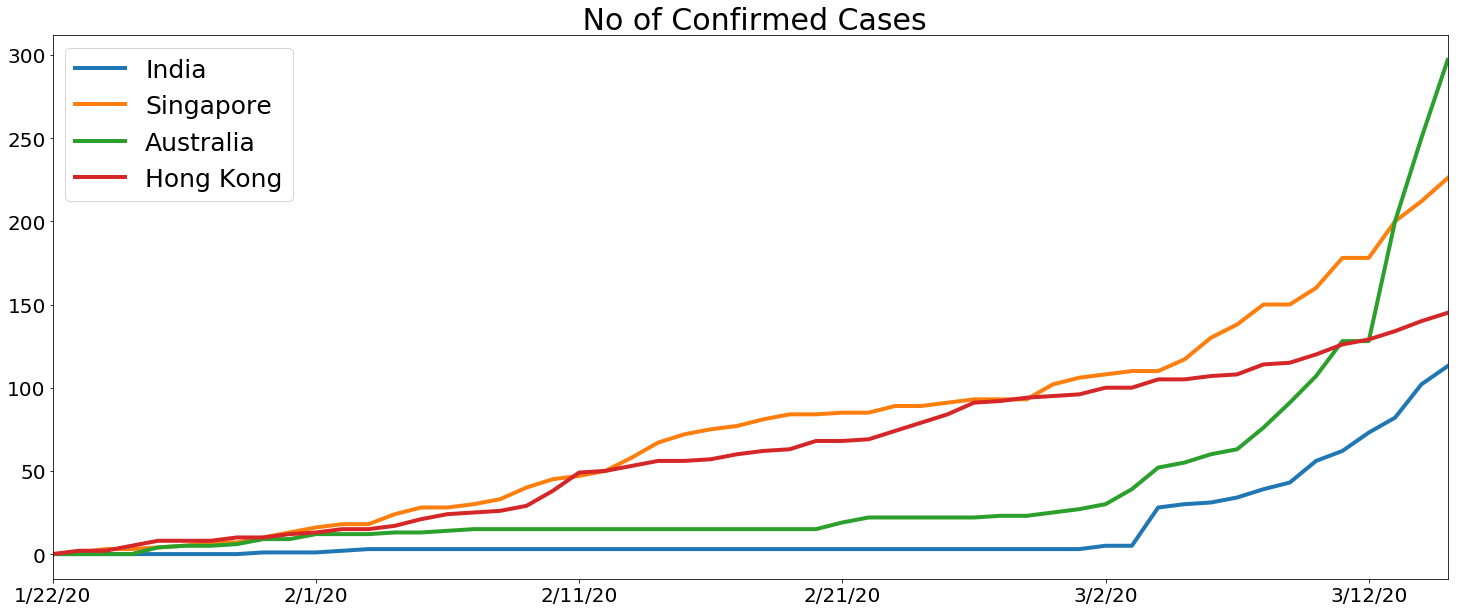

In [267]:
drawChartForVirus(["India","Singapore","Australia"],["Hong Kong"] )

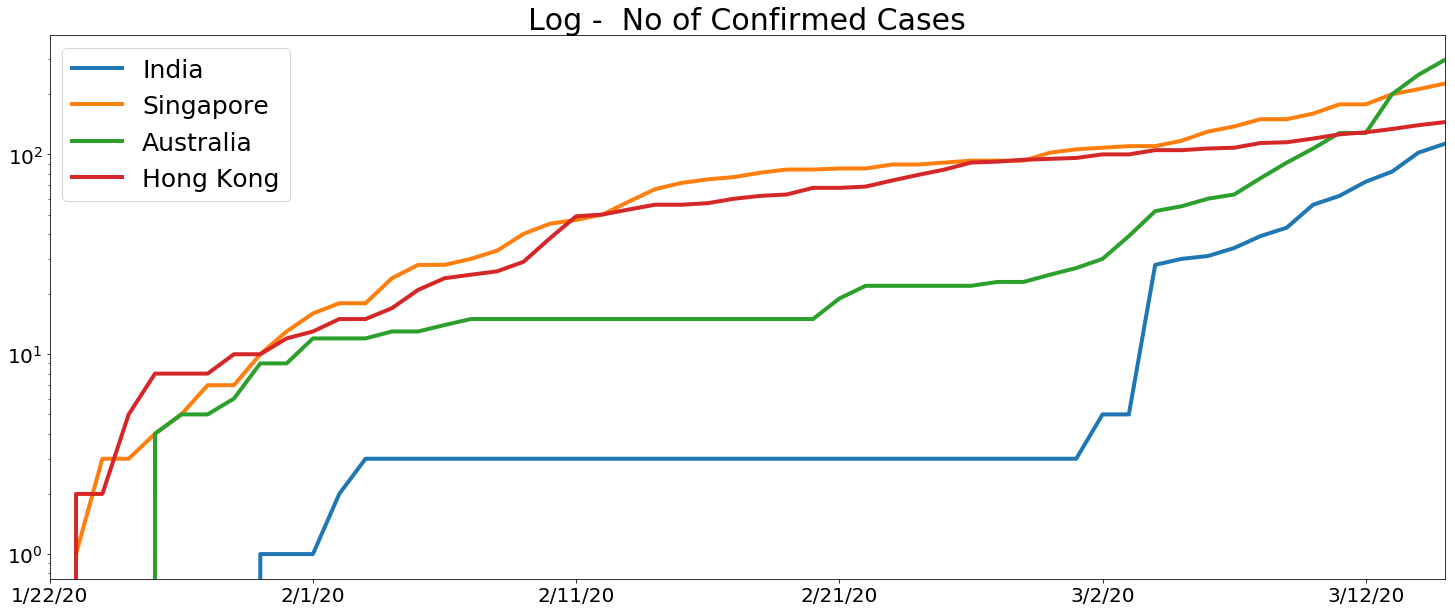

In [268]:
drawChartForVirus(["India","Singapore","Australia"],["Hong Kong"],True )

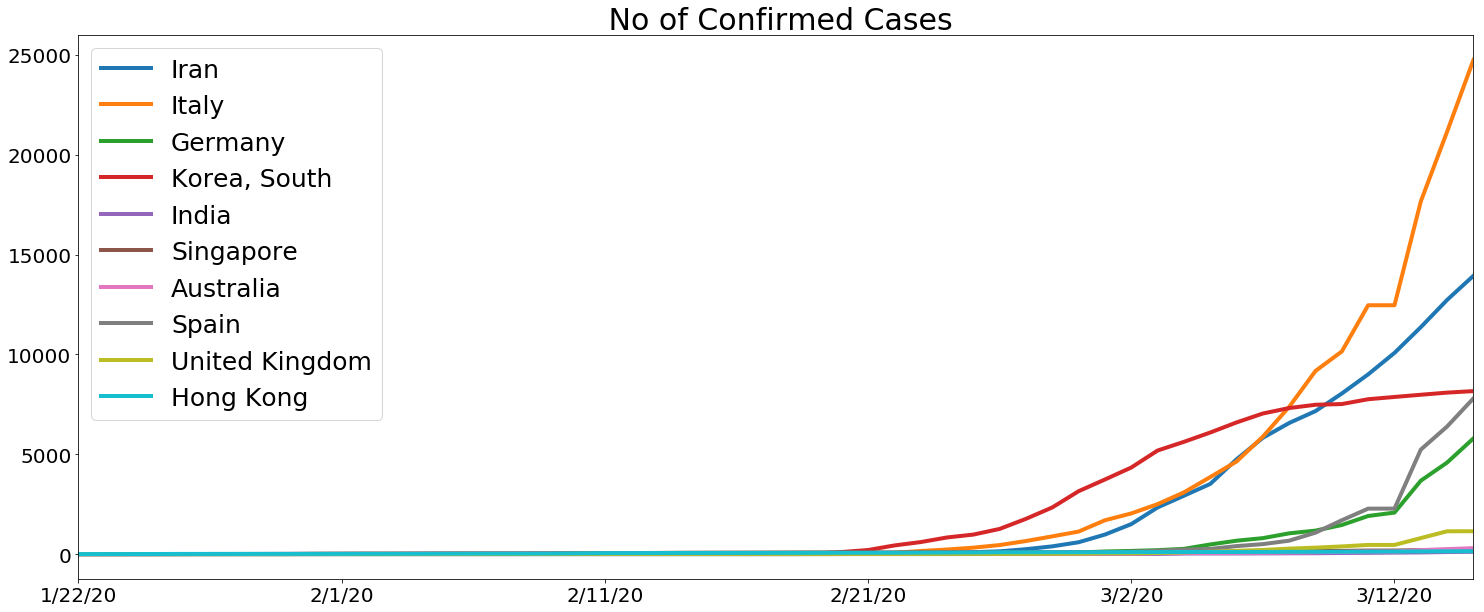

In [269]:
drawChartForVirus(["Iran","Italy","Germany","Korea, South","India","Singapore","Australia","Spain","United Kingdom"],["Hong Kong"],False )



In [ ]:
drawChartForVirus(["Iran","Italy","Germany","Korea, South","India","Singapore","Australia","Spain","United Kingdom"],["Hong Kong"],True )


